In [95]:
import sklearn
from sklearn.datasets import make_circles

In [96]:
#Make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples,        #sample number
                    noise=0.05,       #add randomness to our data
                    random_state=42) #same as random seed

In [97]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")
# First 5 samples of X: [[ 0.75424625  0.23148074]   2 features of X for every y
#  [-0.75615888  0.15325888]
#  [-0.81539193  0.17328203]
#  [-0.39373073  0.69288277]
#  [ 0.44220765 -0.89672343]]
# First 5 samples of y: [1 1 1 1 0]       y is binary

First 5 samples of X: [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
First 5 samples of y: [1 1 1 1 0]


In [98]:
#Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label": y})
circles.head(10)
# 0.7542462506997276,0.23148073787097836,1
# -0.7561588822214413,0.15325887663494678,1
# -0.8153919335251194,0.17328202920351576,1
# -0.393730728902315,0.6928827699017868,1
# 0.4422076451826442,-0.8967234339920015,0
# -0.4796463680909052,0.6764347685615512,1
# -0.01364835948765009,0.8033487191694424,1
# 0.771513273784567,0.14775958770972614,1
# -0.1693223397310359,-0.7934557525393878,1
# -0.12148579609572473,1.0215090535090692,0

,X1,X2,label
0,0.74221,0.24669,1
1,-0.73403,0.16869,1
2,-0.82986,0.22196,1
3,-0.42914,0.67223,1
4,0.44560,-0.89494,0
5,-0.46989,0.70804,1
6,-0.01605,0.80562,1
7,0.75962,0.15953,1
8,-0.17569,-0.79984,1
9,-0.11062,1.04221,0


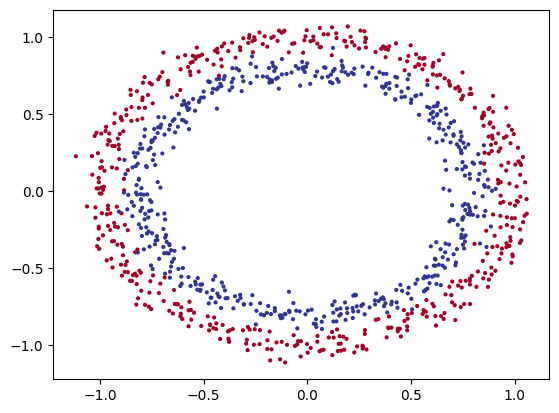

In [99]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],  #x coords are 1st col of X
            y=X[:, 1],  #y coords are 2nd col of X
            s=4,        #size
            c=y,        #we color the dots based on y col
            cmap=plt.cm.RdYlBu); #set dots to red yellow and blue

In [100]:
X.shape, y.shape
#((1000, 2), (1000,))     x has 2 features, y is just a scalar

((1000, 2), (1000,))

In [101]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}")
print(f"Values for one sample of y: {y_sample}")

Values for one sample of X: [0.74220688 0.24668576]
Values for one sample of y: 1


In [102]:
# Turn data into Tensors
import torch
X = torch.from_numpy(X).type(torch.float) #default  for torch is is float 32,
y = torch.from_numpy(y).type(torch.float) #default for numpy is float64

X[:5], y[:5]
# (tensor([[ 0.7422,  0.2467],
#          [-0.7340,  0.1687],
#          [-0.8299,  0.2220],
#          [-0.4291,  0.6722],
#          [ 0.4456, -0.8949]]),
#  tensor([1., 1., 1., 1., 0.]))

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [103]:
# Split data into training and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of data is test
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [104]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [105]:
from sklearn import datasets
# 1 Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,   # number of features in X
                                 out_features=5)  # arbitrary
        self.layer_2 = nn.Linear(in_features=5,   # output from above is passed in
                                 out_features=1)  # prediction for y is returned
    # 3. Define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) #layer 2 is passed in layer 1 which is passed in X

# 4. Instatiate an instance of ouor model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [106]:
next(model_0.parameters())
# Parameter containing:
# tensor([[ 0.6906,  0.2828],
#         [-0.4356,  0.6881],
#         [ 0.2373,  0.3026],
#         [-0.1352,  0.1721],
#         [ 0.1612, -0.4702]], requires_grad=True)

Parameter containing:
tensor([[-0.4006,  0.5279],
        [ 0.5715,  0.5381],
        [ 0.5505, -0.1430],
        [ 0.6321, -0.5993],
        [ 0.6775,  0.2872]], requires_grad=True)

In [107]:
# Lets replicate the above model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0
# Sequential(
#   (0): Linear(in_features=2, out_features=5, bias=True)
#   (1): Linear(in_features=5, out_features=1, bias=True)
# )

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [108]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5078, -0.1173],
        [-0.0343, -0.3164],
        [-0.3085,  0.3322],
        [-0.1349, -0.0231],
        [ 0.1673,  0.1388]], requires_grad=True)

In [109]:
# Make some predictions
model_0.state_dict()
# OrderedDict([('0.weight',     2 weight and bias tensors
#               tensor([[ 0.0057, -0.0453],
#                       [ 0.1261,  0.3403],
#                       [ 0.2177,  0.3748],
#                       [ 0.2893, -0.1224],
#                       [-0.3013,  0.2374]])),
#              ('0.bias', tensor([ 0.5627, -0.0750,  0.3069, -0.6305, -0.3226])),
#              ('1.weight',
#               tensor([[-0.0556, -0.2433,  0.1876,  0.3159, -0.3312]])),
#              ('1.bias', tensor([-0.3915]))])

OrderedDict([('0.weight',
              tensor([[ 0.5078, -0.1173],
                      [-0.0343, -0.3164],
                      [-0.3085,  0.3322],
                      [-0.1349, -0.0231],
                      [ 0.1673,  0.1388]])),
             ('0.bias', tensor([ 0.2323, -0.0210,  0.0207,  0.2668,  0.5677])),
             ('1.weight',
              tensor([[ 0.1946, -0.3106, -0.0421, -0.2512,  0.3104]])),
             ('1.bias', tensor([0.0025]))])

In [110]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")
# Length of Predictions: 200, Shape: torch.Size([200, 1])
# Length of test samples: 200, Shape: torch.Size([200, 2])
#
# First 10 predictions:
# tensor([[-0.5978],
#         [-0.5462],
#         [-0.5385],
#         [-0.6152],
#         [-0.2614],
#         [-0.2321],
#         [-0.3313],
#         [-0.2592],
#         [-0.5429],
#         [-0.5515]])
#
# First 10 labels:
# tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

Length of Predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.1614],
        [ 0.2780],
        [-0.0138],
        [ 0.2181],
        [ 0.1557],
        [ 0.2290],
        [ 0.4048],
        [ 0.3957],
        [-0.0287],
        [ 0.2782]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [111]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function e.g. 0 to 1

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [112]:
# Calculate accuracy - out of 100 examples, what percentage do we get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  #sums the equivalencies between the tensors
    acc = (correct / len(y_true)) * 100
    return acc

In [113]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
len(y_logits)
# 0,-0.59783
# 1,-0.54622
# 2,-0.53848
# 3,-0.61515
# 4,-0.26140


200

In [117]:
y_pred_probs = torch.sigmoid(y_logits)[:5]
y_pred_probs
# 0,0.35484
# 1,0.36674
# 2,0.36854
# 3,0.35089
torch.round(y_pred_probs)
# 0,0.0
# 1,0.0
# 2,0.0
# 3,0.0

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]])

In [118]:
y_preds = torch.round(y_pred_probs)

# pass X_test through our model, send it through the sigmoid, and round it
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze(), y_pred_labels.squeeze()

#tensor([True, True, True, True, True])

tensor([True, True, True, True, True])


(tensor([1., 1., 0., 1., 1.]),
 tensor([1., 1., 0., 1., 1.], grad_fn=<SqueezeBackward0>))

In [127]:
torch.manual_seed(42)

#Put data to target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_0.train()
    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits into pred probabilities into pred labels

    #2. Calc loss and accuracy
    loss = loss_fn(y_logits, # Because we are using BCEWithLogitsLoss,
                             # we must pass in logits and NOT probabilities
                             # like normal. This combines the sigmoud with BCE loss
                   y_train)
    acc = accuracy_fn(y_true=y_train,  # This is our own testing function that we made
                      y_pred=y_pred)   # earlier

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Back propagation
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss / accuracy
        test_loss = loss_fn(test_logits,          # in Torch, we always pass in the test
                            y_test)               # followed by the training data
        test_acc = accuracy_fn(y_true=y_test,     # in scikit-learn, which our function
                               y_pred=test_pred)  # seeks to mimic, we pass the training data
                                                  # followed by the prediction data
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss: .5f} | Test Acc: {test_acc:.2f}")
# Epoch: 0 | Loss: 0.69812 | Acc: 55.25 | Test Loss:  0.70413 | Test Acc: 49.00
# Epoch: 10 | Loss: 0.69780 | Acc: 55.12 | Test Loss:  0.70377 | Test Acc: 49.00
# Epoch: 20 | Loss: 0.69752 | Acc: 55.25 | Test Loss:  0.70343 | Test Acc: 48.50
# Epoch: 30 | Loss: 0.69725 | Acc: 54.75 | Test Loss:  0.70312 | Test Acc: 49.50
# Epoch: 40 | Loss: 0.69701 | Acc: 54.50 | Test Loss:  0.70284 | Test Acc: 49.00
# Epoch: 50 | Loss: 0.69678 | Acc: 54.37 | Test Loss:  0.70257 | Test Acc: 48.50
# Epoch: 60 | Loss: 0.69657 | Acc: 53.75 | Test Loss:  0.70232 | Test Acc: 49.00
# Epoch: 70 | Loss: 0.69638 | Acc: 53.75 | Test Loss:  0.70209 | Test Acc: 48.50
# Epoch: 80 | Loss: 0.69620 | Acc: 53.75 | Test Loss:  0.70188 | Test Acc: 49.00
# Epoch: 90 | Loss: 0.69604 | Acc: 53.25 | Test Loss:  0.70168 | Test Acc: 48.50

Epoch: 0 | Loss: 0.69589 | Acc: 53.12 | Test Loss:  0.70149 | Test Acc: 48.00
Epoch: 10 | Loss: 0.69575 | Acc: 53.12 | Test Loss:  0.70132 | Test Acc: 48.00
Epoch: 20 | Loss: 0.69562 | Acc: 53.12 | Test Loss:  0.70116 | Test Acc: 48.00
Epoch: 30 | Loss: 0.69551 | Acc: 53.25 | Test Loss:  0.70101 | Test Acc: 48.00
Epoch: 40 | Loss: 0.69540 | Acc: 52.75 | Test Loss:  0.70087 | Test Acc: 47.00
Epoch: 50 | Loss: 0.69529 | Acc: 52.50 | Test Loss:  0.70074 | Test Acc: 47.50
Epoch: 60 | Loss: 0.69520 | Acc: 52.62 | Test Loss:  0.70061 | Test Acc: 48.00
Epoch: 70 | Loss: 0.69511 | Acc: 52.88 | Test Loss:  0.70050 | Test Acc: 47.50
Epoch: 80 | Loss: 0.69503 | Acc: 52.88 | Test Loss:  0.70039 | Test Acc: 46.50
Epoch: 90 | Loss: 0.69496 | Acc: 53.12 | Test Loss:  0.70028 | Test Acc: 47.50
Epoch: 100 | Loss: 0.69489 | Acc: 53.12 | Test Loss:  0.70019 | Test Acc: 47.00
Epoch: 110 | Loss: 0.69482 | Acc: 53.12 | Test Loss:  0.70010 | Test Acc: 47.00
Epoch: 120 | Loss: 0.69476 | Acc: 53.12 | Test Loss

In [128]:
# 4. Visualize
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch Repo. Get the info at the link, create our file
# with write permissions, and then write the contents of the request
if not Path("helper_functions.py").is_file():
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

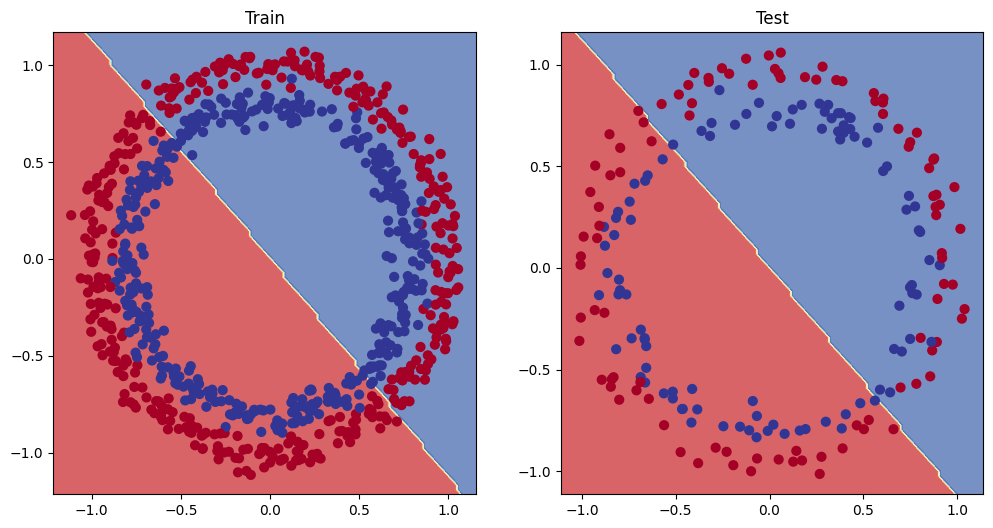

In [129]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  #rows, cols, slot in plot
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [132]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return(self.layer_3(self.layer_2(self.layer_1(x))))

model_1 = CircleModelV1().to(device)
model_1
# CircleModelV1(
#   (layer_1): Linear(in_features=2, out_features=10, bias=True)
#   (layer_2): Linear(in_features=10, out_features=10, bias=True)
#   (layer_3): Linear(in_features=10, out_features=1, bias=True)
# )

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [139]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# and an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [140]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)
epochs = 1000

for epoch in range(epochs):
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> probabilities -> definite labels
    # 2. Loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # 3-5. Zero grad, backpropagate, step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: %{acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: %{test_acc:.2f}")
# Epoch: 0 | Loss: 0.71086 | Acc: %50.00 | Test Loss: 0.70705 | Test Acc: %50.00
# Epoch: 100 | Loss: 0.69310 | Acc: %49.00 | Test Loss: 0.69346 | Test Acc: %49.00
# Epoch: 200 | Loss: 0.69300 | Acc: %51.25 | Test Loss: 0.69423 | Test Acc: %47.50
# Epoch: 300 | Loss: 0.69298 | Acc: %51.00 | Test Loss: 0.69450 | Test Acc: %45.50
# Epoch: 400 | Loss: 0.69298 | Acc: %51.25 | Test Loss: 0.69460 | Test Acc: %46.00
# Epoch: 500 | Loss: 0.69298 | Acc: %51.25 | Test Loss: 0.69464 | Test Acc: %46.00
# Epoch: 600 | Loss: 0.69298 | Acc: %51.50 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 700 | Loss: 0.69298 | Acc: %51.50 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 800 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
# Epoch: 900 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50


Epoch: 0 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 100 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 200 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 300 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 400 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 500 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 600 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 700 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 800 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50
Epoch: 900 | Loss: 0.69298 | Acc: %51.62 | Test Loss: 0.69466 | Test Acc: %45.50


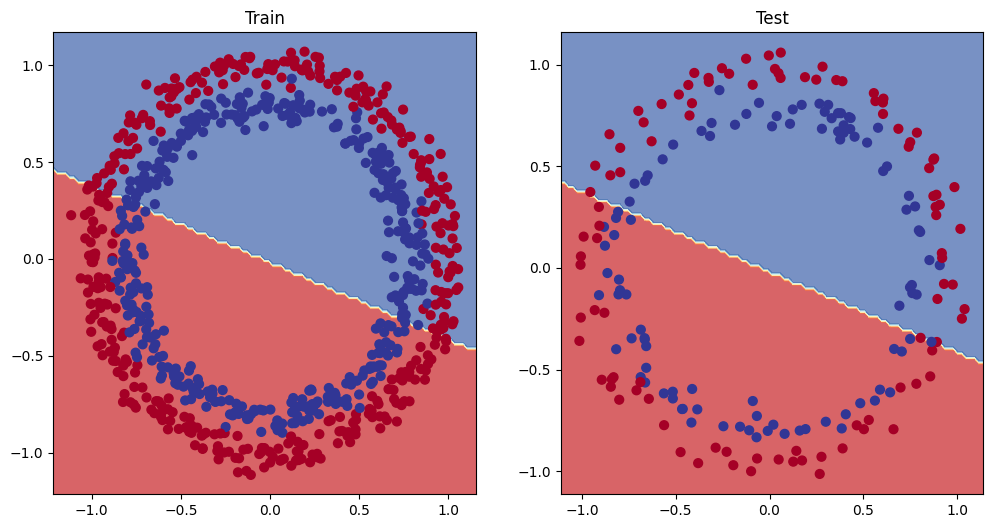

In [141]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)  #rows, cols, slot in plot
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
# Prep data to see if our model is even working at all for anything